Celem projektu jest sprawdzenie zależności pomiędzy szerokością geograficzną a średnią temperaturą oraz zbudowanie prostego modelu regresyjnego. Dane są celowo redukowane, aby przyspieszyć trening modelu.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error

df = pd.read_csv('GlobalLandTemperaturesByMajorCity.csv')
df.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
0,1849-01-01,26.704,1.435,Abidjan,Côte D'Ivoire,5.63N,3.23W
1,1849-02-01,27.434,1.362,Abidjan,Côte D'Ivoire,5.63N,3.23W
2,1849-03-01,28.101,1.612,Abidjan,Côte D'Ivoire,5.63N,3.23W
3,1849-04-01,26.140,1.387,Abidjan,Côte D'Ivoire,5.63N,3.23W
4,1849-05-01,25.427,1.200,Abidjan,Côte D'Ivoire,5.63N,3.23W


In [2]:
data = df[['AverageTemperature', 'Latitude']].copy()
data = data.dropna()
data = data.sample(frac=0.1, random_state=42)
data.head()

,AverageTemperature,Latitude
169333,33.002,28.13N
7291,24.640,36.17N
156624,-6.006,55.45N
11589,25.395,31.35N
182894,24.365,16.87N


In [3]:
data['Latitude'] = data['Latitude'].str.replace('N', '').str.replace('S', '')
data['Latitude'] = data['Latitude'].astype(float)
data.head()

,AverageTemperature,Latitude
169333,33.002,28.13
7291,24.640,36.17
156624,-6.006,55.45
11589,25.395,31.35
182894,24.365,16.87


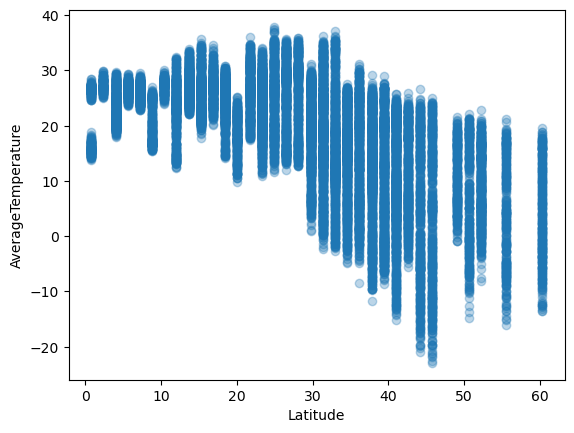

In [4]:
plt.figure()
plt.scatter(data['Latitude'], data['AverageTemperature'], alpha=0.3)
plt.xlabel('Latitude')
plt.ylabel('AverageTemperature')
plt.show()

In [5]:
X = data[['Latitude']]
y = data['AverageTemperature']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [6]:
model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

mse, mae

(61.32572241667351, 6.124050041325712)

Dowiedziałem się:
Średnia temperatura wyraźnie maleje wraz ze wzrostem szerokości geograficznej.

Preprocessing:
Usunięto braki danych, ograniczono zbiór do jednej cechy (Latitude) oraz zredukowano liczbę obserwacji losowym próbkowaniem.

Jak poradził sobie model:
Model regresji liniowej poprawnie uchwycił ogólny trend zależności, lecz charakteryzuje się umiarkowaną dokładnością.

Co można by zrobić dalej:
Model można rozszerzyć o dodatkowe cechy lub zastosować podejście nieliniowe w celu poprawy jakości predykcji.